<a href="https://colab.research.google.com/github/SamuelMiller413/Coding-Nomads-Deep-Learning-Miniproject-1/blob/master/dl_miniproject_1_tabular_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Intrdouction
---

## Problem Statement:
> An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

>In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.

>You are required to help the manager to predict the right group of the new customers.

## Resources
>Data    (from Kaggle)
* [Customer Segmentation Dataset](https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation?select=train.csv) 

> Notebooks of Influence
* [Janatahack](https://www.kaggle.com/code/abisheksudarshan/av-janatahack-customer-segmentation/data) 
* [Seun Ayegboyin](https://www.kaggle.com/code/seunayegboyin/customer-segmentation-with-kmeans-and-pca) (PCA/Clustering)

---
# Work Flow
---

### NOTES
* Write 
        def grep()
        def greps_all()
* OHE all
* Impute NaN
* Train Models
* Train DL Models


### Workflow Outline

---
#### 1. Pre-Training
---
* Setup
    * Data Loading
    * Download the Dataset
* EDA & Data Visualization
* Feature Engineering and Transformation
* Pipelines
<br>
---
#### 2. Training
---
* Traditional ML Modeling
* Pure Torch Model
* High-level Libraries and Tabular Frameworks
<br>
---
#### 3. Testing
---
* Model Selection and Test Set Evaluation
* Notes and Findings



---
# 1. Pre-Training
---
* Setup
    * Data Loading
    * Download the Dataset
* EDA & Data Visualization
    * Data Viz Functions
* Feature Engineering and Transformation
* Pipelines

## Data Loading and Splitting

In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# upload 'kaggle.json'
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"samuelmiller413","key":"d635e1518efc064bb478bb67bb2c22aa"}'}

In [3]:
# make kaggle directory 
! mkdir ~/.kaggle
# store JSON
! cp kaggle.json ~/.kaggle/
# change permissions
! chmod 600 ~/.kaggle/kaggle.json

# download data from kaggle
! kaggle datasets download -d 'abisheksudarshan/customer-segmentation'
# make directory for data
! mkdir customer-segmentation

# unzip into directory
! cd.. customer-segmentation/
! unzip customer-segmentation.zip -d customer-segmentation/
# remove .zip
! rm -r customer-segmentation.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/98.7k [00:00<?, ?B/s]
100% 98.7k/98.7k [00:00<00:00, 44.3MB/s]
mkdir: cannot create directory ‘customer-segmentation’: File exists
/bin/bash: cd..: command not found
Archive:  customer-segmentation.zip
replace customer-segmentation/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: customer-segmentation/test.csv  
replace customer-segmentation/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: customer-segmentation/train.csv  


#### Setup

In [53]:
%%capture
# import libraries
import numpy as np 
import pandas as pd 
import pprint
                                                                          # PRE-PROCESSING
from sklearn.preprocessing import StandardScaler
                                                                          # FEATURE SELECTION
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel, mutual_info_regression, RFE, RFECV

                                                                          # PIPELINE
from sklearn.pipeline import Pipeline
                                          
                                                                          # NEURAL NETWORK
from sklearn.neural_network import MLPRegressor

                                                                          # CROSS VALIDATION
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import learning_curve, cross_val_predict
from sklearn.model_selection import KFold, RandomizedSearchCV

                                                                          # EVALUATION
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import SCORERS

                                                                          # PLOTTING
# from plotting import plot_learning_curve, plot_validation_curve
import random
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#### Download Dataset

In [5]:
csv_train = '/content/customer-segmentation/train.csv'
csv_test = '/content/customer-segmentation/test.csv'

#### Split Data

In [6]:
# > data is pre-split into two files <
# read split data
train = pd.read_csv(csv_train)
test = pd.read_csv(csv_test)
# meta encode whether df is 'train'
train['train_y_n']=1
test['train_y_n']=0
# make full df
full_df = pd.concat([train, test])

In [23]:
# mini dataframes
comp_df1 = full_df.loc[full_df['train_y_n'] == 1].head()
comp_df2 = full_df.loc[full_df['train_y_n'] == 0].tail()
comps_df = pd.concat([comp_df1, comp_df2])
# list dfs and verify their datatype
df_dict = {'train':train, 'test':test, 'full_df':full_df, 'comp_df1':comp_df1, 'comp_df2':comp_df2, 'comps_df':comps_df}
print([type(v) for k,v in df_dict.items()])

[<class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>]


In [32]:

len(df_dict)


6

In [110]:
# scoping the dataframes

# shapes
print('\n---\nShapes\n---\n')
[print(f"{k.upper()} : {v.shape}\n") for k,v in df_dict.items()]
print("\n=====================\n")
# columns
print('\n---\nColumns\n---\n')
[print(f"\n---\n{k.upper()} Columns: \n---\n\n{v.columns}\n") for k,v in df_dict.items()]
print("\n=====================\n")
# samples
print("\n---\nSamples\n---\n")
[print(f"\n---\n{k.upper()} Samples: \n---\n\n{v.sample(5)}\n\n\n") for k,v in df_dict.items()]


---
Shapes
---

TRAIN : (8068, 12)

TEST : (2627, 11)

FULL_DF : (10695, 12)

COMP_DF1 : (5, 12)

COMP_DF2 : (5, 12)

COMPS_DF : (10, 12)




---
Columns
---


---
TRAIN Columns: 
---

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'train_y_n'],
      dtype='object')


---
TEST Columns: 
---

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'train_y_n'],
      dtype='object')


---
FULL_DF Columns: 
---

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'train_y_n'],
      dtype='object')


---
COMP_DF1 Columns: 
---

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
    

[None, None, None, None, None, None]

### EDA & data visualization

#### Data Viz Functions

In [94]:
# initialize plotting dict
graph_ = {
    'relplot': sns.relplot,
    'scatterplot': sns.scatterplot,
    'lineplot': sns.lineplot,
    'displot': sns.displot,
    'histplot': sns.histplot,
    'kdeplot': sns.kdeplot,
    'ecdfplot': sns.ecdfplot,
    'rugplot': sns.rugplot,
    'catplot': sns.catplot,
    'stripplot': sns.stripplot,
    'swarmplot': sns.swarmplot,
    'boxplot': sns.boxplot,
    'violinplot': sns.violinplot,
    'boxenplot': sns.boxenplot,
    'pointplot': sns.pointplot,
    'barplot': sns.barplot,
    'countplot': sns.countplot,
    'lmplot':' sns.lmplot',
    'regplot': 'sns.regplot',
    'residplot': 'sns.residplot',
    'heatmap': 'sns.heatmap',
    'clustermap': 'sns.clustermap',
    'FacetGrid': 'sns.FacetGrid',
    'pairplot': 'sns.pairplot',
    'PairGrid': 'sns.PairGrid',
    'jointplot': 'sns.jointplot',
    'JointGrid': sns.JointGrid
    }
# set target variable
target = 'segmentation'          # <--- needs scaling
sizes = {'s':((10,6)),'m':(14,8), 'l':(18,10)}

In [190]:
def plot_grep(feature, label=target, plot_type='countplot', fig_size='s',subset=train): 
    '''
    Doc:
        Greps feature with label.
        Displays a seaborn plot of grep.

        Parameters
        -------------
            feature   : (str)
                Feature to plot 'label' by
            label     : (str)    
                Label (or additional feature) to plot 'feature' by  
                default   = target
                    * save a variable 'target' as df.columns['target variable']               
            plot_type : (dict)
                Specify a seaborn plot function from {graph_}
                    default: 'countplot'      
            fig_size  : {'s', 'm', 'l'}
                Choose a small , medium, or large figure size
                default   : {'s'=10x6, 'm'=14x8, 'l'=18x10}
            subset    : (dataframe)
                Specify which subset of the dataframe to use
                default   = 'train'
                examples  : 'train', 'test','all', etc.
        
        Returns
        -------------
            Seaborn plot of grep(feature,label)

        Plot Options: 
        -------------
        --> from Seaborn API Reference : https://seaborn.pydata.org/api.html
        
        Relational Plots
        ---
        'relplot'     - Figure-level interface for drawing relational plots onto a FacetGrid.
        'scatterplot' - Draw a scatter plot with possibility of several semantic groupings.
        'lineplot'    - Draw a line plot with possibility of several semantic groupings.

        Distribution Plots
        ---
        'displot'     - Figure-level interface for drawing distribution plots onto a FacetGrid.
        'histplot'    - Plot univariate or bivariate histograms to show distributions of datasets.
        'kdeplot'     - Plot univariate or bivariate distributions using kernel density estimation.

        Categorical Plots
        ---
        'ecdfplot'    - Plot empirical cumulative distribution functions.
        'rugplot'     - Plot marginal distributions by drawing ticks along the x and y axes.
        'catplot'     - Figure-level interface for drawing categorical plots onto a FacetGrid.
        'stripplot'   - Draw a scatterplot where one variable is categorical.
        'swarmplot'   - Draw a categorical scatterplot with non-overlapping points.
        'boxplot'     - Draw a box plot to show distributions with respect to categories.
        'violinplot'  - Draw a combination of boxplot and kernel density estimate.
        'boxenplot'   - Draw an enhanced box plot for larger datasets
        'pointplot'   - Show point estimates and confidence intervals using scatter plot glyphs.
        'barplot'     - Show point estimates and confidence intervals as rectangular bars.
        'countplot'   - Show the counts of observations in each categorical bin using bars.

        Regression Plots
        ---
        'lmplot'      - Plot data and regression model fits across a FacetGrid.
        'regplot'     - Plot data and a linear regression model fit.
        'residplot'   - lot the residuals of a linear regression.

        Matrix Plots
        ---
        'heatmap'     - Plot rectangular data as a color-encoded matrix.
        'clustermap'  - Plot a matrix dataset as a hierarchically-clustered heatmap.

        MULTI-PLOT GRIDS

        FacetGrid
        ---
        'FacetGrid'   - Multi-plot grid for plotting conditional relationships.

        Pair Grids
        ---
        'pairplot'    - Plot pairwise relationships in a dataset.
        'PairGrid'    - Subplot grid for plotting pairwise relationships in a dataset.

        Joint 'Grids'
        ---
        'jointplot'   - Draw a plot of two variables with bivariate and univariate graphs.
        'JointGrid'   - Grid for drawing a bivariate plot with marginal univariate plots.
    '''
    # filter input for matching 
    feature = feature.title()
    label = label.title()
    # increase size for age
    if (feature == 'Age') & (fig_size == 's'):
        aging = True
        while aging == True:
            resp = input(f'This {feature} feature has quite the range!\n\
            Would you like to increase the size for better readability?\n\n(y) or (n)   --> ')
            if resp.lower() == 'n':
                print("You know best!")
                aging = False
            else:               # resp.lower() == 'y': 
                print("Great idea!")
                fig_size = 'm'
                aging = False   
    # plot
    fig, ax = plt.subplots(figsize=sizes[fig_size])
    graph_[plot_type](subset[feature],hue=subset[label])
    plt.show() 

def plot_all_grep(feature, plot_type='countplot', fig_size='s',subset=train): 
    # filter input for matching 
    feature = feature.title()
    # label = label.title()
    # increase size for age
    for i in range(1,(len(subset.columns)-1)):
        by_feature = subset[subset.columns[i]]
        if (subset.columns[i] == 'Age') & (fig_size == 's'):
            # plot
            fig, ax = plt.subplots(figsize=sizes['m'])
            graph_[plot_type](by_feature,hue=subset[feature])
            plt.show() 
        else:
            # plot
            fig, ax = plt.subplots(figsize=sizes[fig_size])
            graph_[plot_type](by_feature,hue=subset[feature])
            plt.show() 

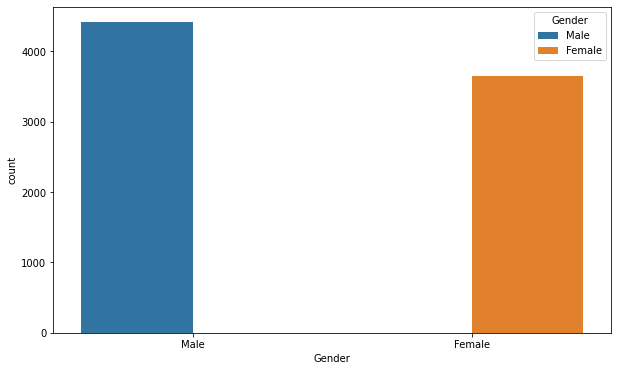

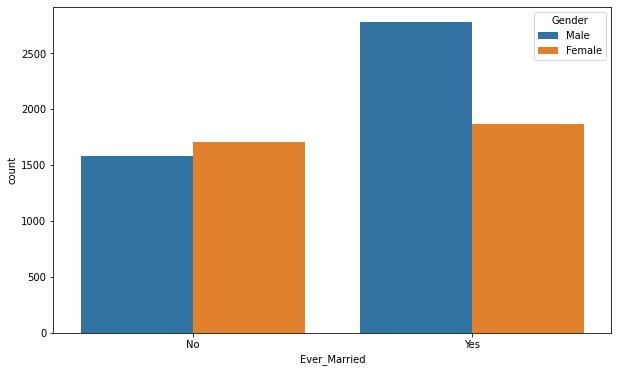

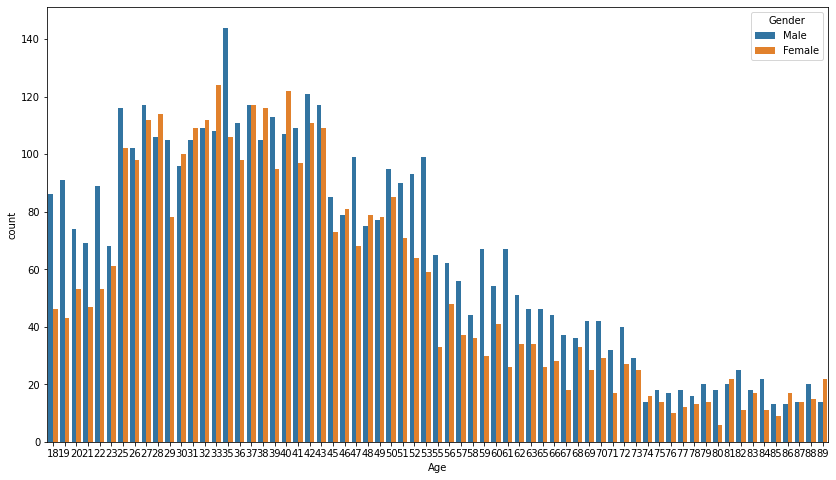

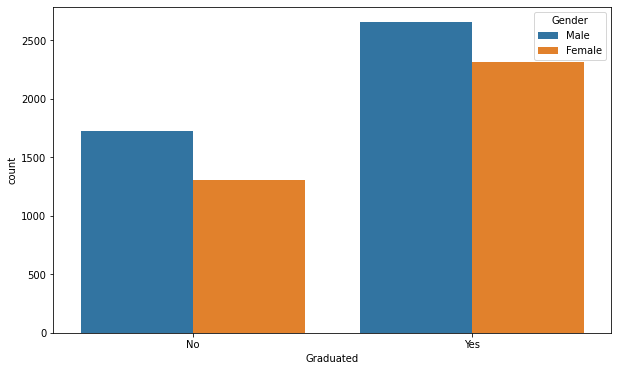

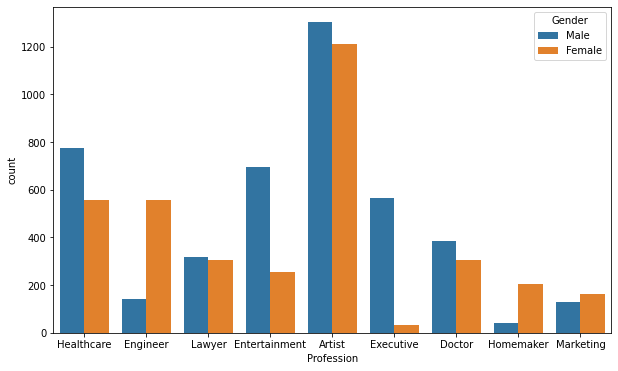

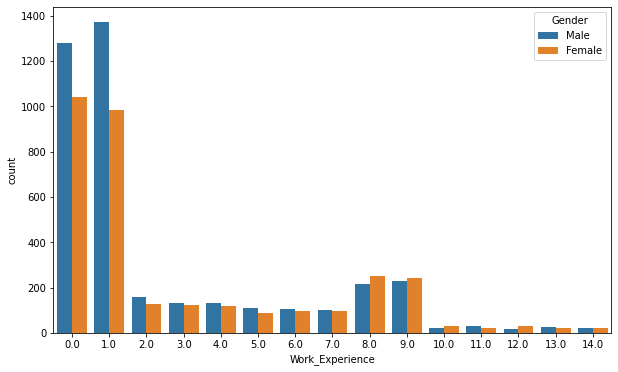

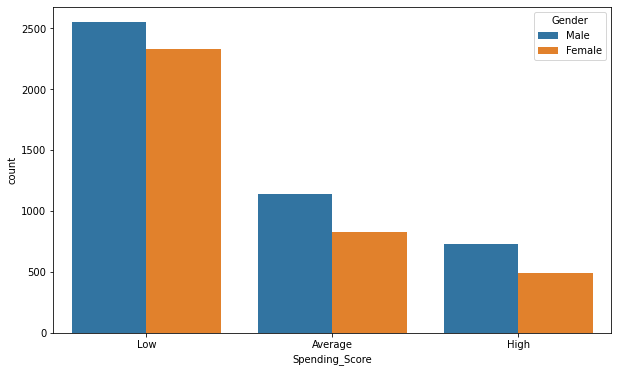

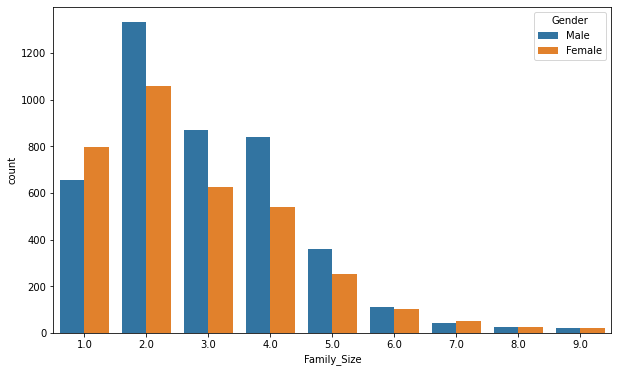

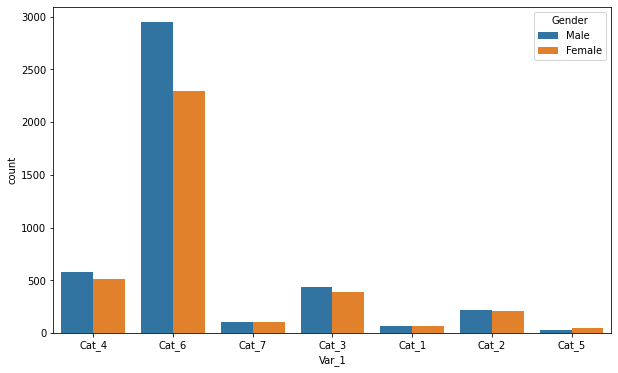

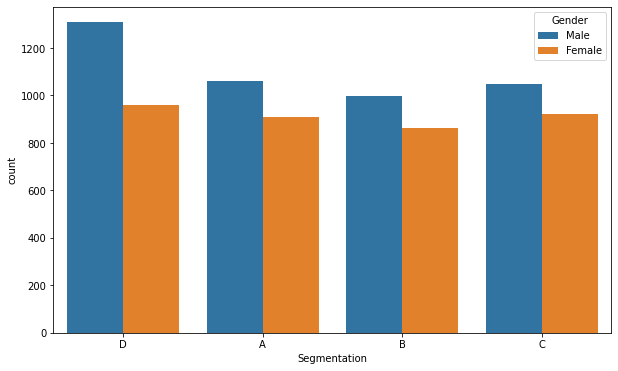

In [191]:
plot_all_grep('gender')
# print(train.columns[11])
# for i in range(1,11):
#     print(i)

In [193]:
# Notes for later:
# program a function that takes the correlations that a heatmap would show, but prints grep graphs for each significant pairing

In [194]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,train_y_n
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,1
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,1
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,1
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,1
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,1


In [115]:
test.sample()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,train_y_n
831,461769,Male,No,37,Yes,Artist,0.0,Low,1.0,Cat_6,0


## Feature engineering and transformation

In [ ]:
# Your code here

---
# 2. Training
---
* Traditional ML Modeling
* Pure Torch Model
* High-level Libraries and Tabular Frameworks

## Traditional ML modeling

In [ ]:
# Your code here

## Pure `torch` model

In [ ]:
# Your code here

## High-level libraries and tabular frameworks

In [ ]:
# Your code here

---
# 3. Testing
---
* Model Selection and Test Set Evaluation
* Notes and Findings

## Model selection and test set evaluation

In [ ]:
# Your code here

## Notes and findings

What did you learn?